In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This dataset contains Historical information about adjusted closing prices of wight different stocks from National Stock Exchange of India.
<br>
Following stocks are taken into consideration - 
<br>


*   Reliance
*  Tata Consultancy Services

*   Bajaj Finance
*   Bharti Airtel

*   Tata Steel
*   HDFC

*   Cipla Pharmaceuticals
*   Havells


In [4]:
path = '/content/gdrive/MyDrive/STOCKS - 2016-2020.csv'
df=pd.read_csv(path)

In [ ]:
# trade = df
# df.drop(['RELIANCE','TCS','BAJAJ'],axis=1,inplace=True)

In [ ]:
df.head()

,Date,RELIANCE,TCS,BAJAJ,BHARTIARTL,TATASTEEL,HDFC,CIPLA,HAVELLS
0,31-12-2020,1978.933960,2843.404053,5286.657715,509.700012,629.561462,1430.110474,819.950012,910.511536
1,30-12-2020,1989.101196,2889.639404,5325.544434,516.150024,626.431458,1426.326904,823.799988,899.082336
2,29-12-2020,1983.668701,2910.696045,5192.110352,520.250000,618.362061,1421.049683,827.950012,903.157043
3,28-12-2020,1996.876221,2909.603516,5195.704590,521.599976,618.802246,1406.761475,830.150024,898.038757
4,24-12-2020,1987.755615,2889.689209,5176.535156,517.299988,608.678711,1391.079346,833.200012,890.386169


In [5]:
stck = pd.read_csv(path)
stck.drop('Date',axis=1,inplace=True)

In [6]:
df['Date']= pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

Plotting the variation of Stock Prices vs Number of days since 01-01-2016

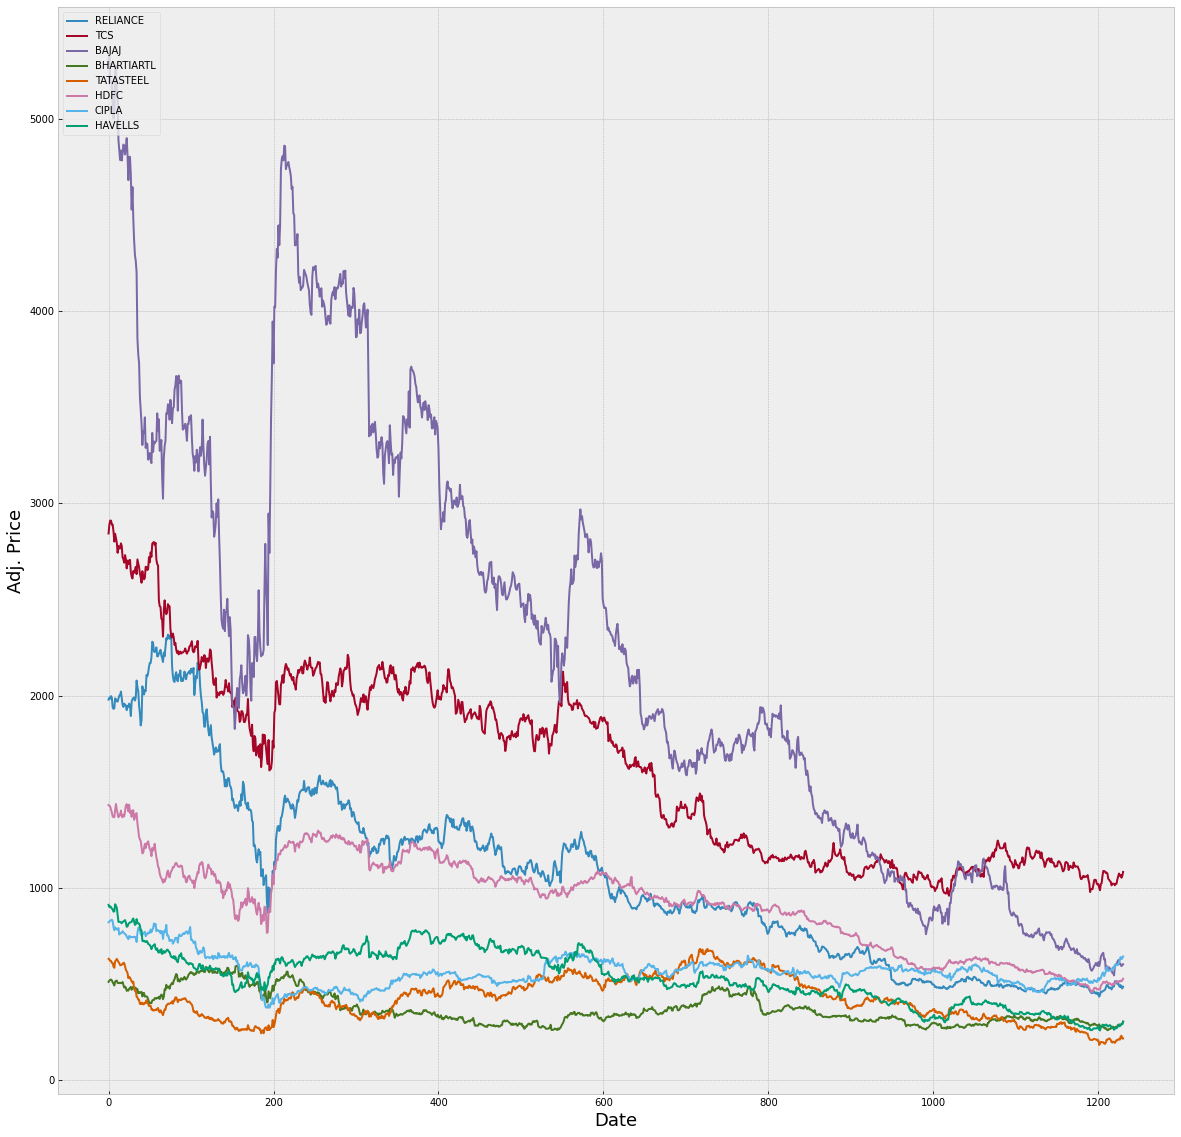

In [7]:

plt.figure(figsize=(20,20))
for c in stck.columns.values:
  plt.plot( stck[c],  label=c)

plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price',fontsize=18)
plt.legend(stck.columns.values, loc=2)
plt.show()

In [8]:
stocks =  [ "RELIANCE","TCS","BAJAJ","BHARTIARTL","TATASTEEL","HDFC","CIPLA","HAVELLS"]

Following formulae were applied in the next code cell
<br><br>

>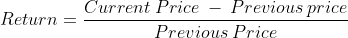





<br>

>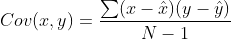

<br>
Resampling of data is important because we need to find annual return. Hence, taking the last of the values of yearly sampled data

In [9]:
returns = df.pct_change()
cov_matrix = returns.cov()
meanReturns = df.resample('Y').last().pct_change().mean()



> CodeCogsEqn (2).gif
<br>


> CodeCogsEqn (3).gif

>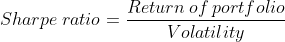



In [11]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(8)
        weights = weights/np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record
        

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    optimised_weights = weights[max_sharpe_idx]
    return sdp,rp,optimised_weights,results
    

In [ ]:
pip install PyPortfolioOpt

In [14]:
sdp,rp,optimised_weights,results = display_simulated_ef_with_random(meanReturns, cov_matrix, 10000, 0)

# Plot of efficient Frontier

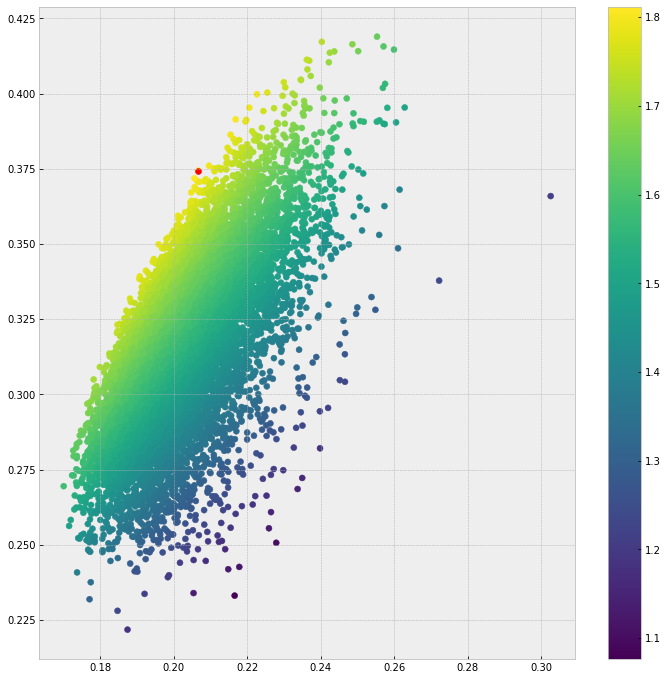

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(results[0],results[1],c = results[2])
plt.colorbar()
plt.scatter(sdp,rp,c='red')
plt.show()

Uisng *PyPortfolioOpt* library to determine an investment portfolio for INR 10000 from above used assets 

In [16]:
wtLST = optimised_weights.tolist()
wht = dict(zip(stocks,wtLST))
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = wht
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
ALLOC = pd.Series(allocation,index=stocks)
print(ALLOC)
print("Funds remaining: Rs. {:.2f}".format(leftover))

RELIANCE      5.0
TCS           3.0
BAJAJ         3.0
BHARTIARTL    1.0
TATASTEEL     NaN
HDFC          NaN
CIPLA         NaN
HAVELLS       7.0
dtype: float64
Funds remaining: Rs. 106.73
